<a href="https://colab.research.google.com/github/peterkahumu/deep-learning/blob/main/Image_classification_cats_and_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification using Tensorflow

The models aims to predict whether the image provided is a cat or a dog.

The data source for this project is for [Kaggle](https://www.kaggle.com)

<hr>

_Main concepts in this exercise are_

1. Building _input pipelines_ using `tf.keras.preprocessing.image.ImageDataGenerator` class.
2. _Overfitting_ and ways to handle it.

<hr>

Dataset: [Dogs and Cats Dataset](https://www.kaggle.com/c/dogs-vs-cats/data) from kaggle.

In [ ]:
# Importing packages

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import matplotlib.pyplot as plt
import numpy as np

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
# use the tf.keras.preprocessing.image.ImageDataGenerator class to read and unzip the dataset.
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin = _URL, extract = True)

68606236/68606236 [==============================] - 0s 0us/step


In [ ]:
# list the directories

zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats


In [ ]:
# assign variables with the proper file path
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats') # directory with the trianing cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # directory with the training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # directory with the validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs') # directory with the validation dog pictures


In [ ]:
# checking the number of cats and dogs pictures in the directories,
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [ ]:
# setting the models parameters

batch_size = 100
img_shape = 150

## Data Preparation

Format the data into pre-processed floating point tensors before feeding it to the network.

This involves the following steps:

1. Read the images from the directory
2. Decode the contents of the images and convert them into proper grid format as per the content.
3. Convert the data into floating point tensors.
4. Rescale the tensors to values between 0 and 1

In [ ]:
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)


In [ ]:
# load the images from the disk, apply rescaling and resize them
train_data_gen = train_image_generator.flow_from_directory(
    batch_size = batch_size,
    directory = train_dir,
    shuffle = True,
    target_size = (img_shape, img_shape),
    class_mode = 'binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    batch_size = batch_size,
    directory = validation_dir,
    shuffle = False,
    target_size = (img_shape, img_shape),
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Visualize the images

In [ ]:
sample_training_images, _ = next(train_data_gen)


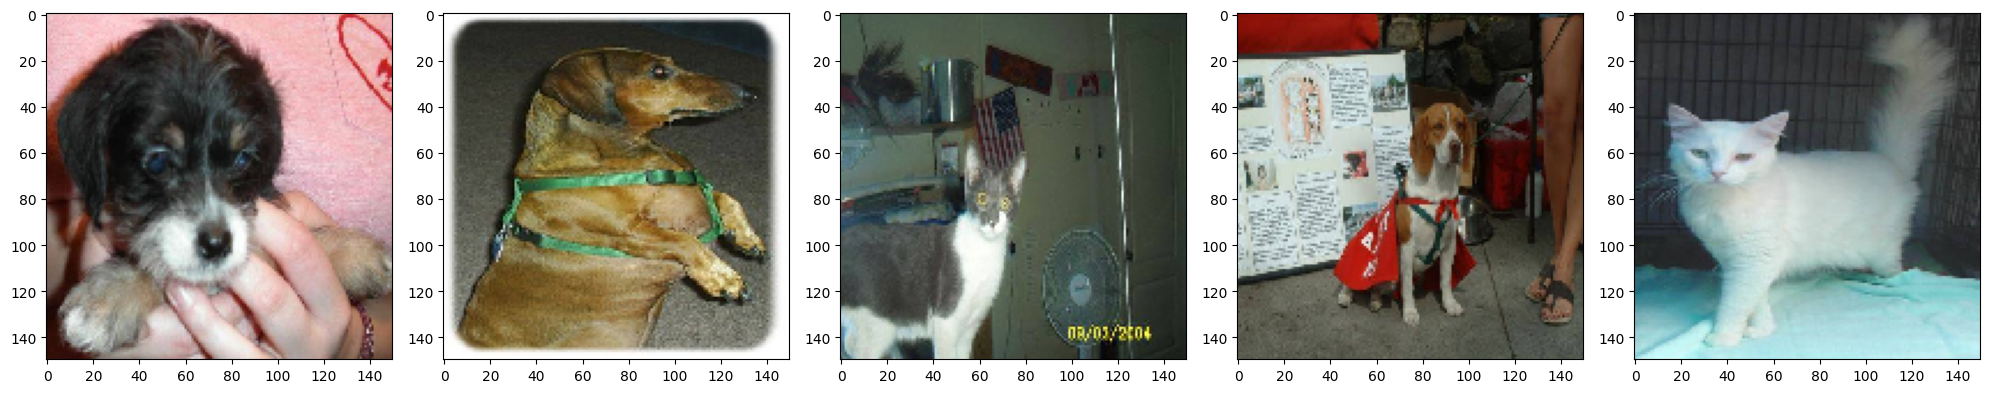

In [ ]:
# create a function to plot the images
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (20, 20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)

  plt.tight_layout()
  plt.show()


plotImages(sample_training_images[:5])


## Model Creation
### Model defination

Model consists of:
1. Four convolution blocks with a max pool layer in each of them.
2. Have a fully connected area with 512 units with a  `relu` activation function.
3. Uses `softmax` to output two class probabilities (_dogs and cats_)

In [ ]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(2, activation = 'softmax')
    ]
)

In [ ]:
# compile the model
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [ ]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
# train the models.

epochs = 100

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = int(np.ceil(total_train / float(batch_size))),
    epochs = epochs,
    validation_data = val_data_gen,
    validation_steps = int(np.ceil(total_val / float(batch_size)))
)

<ipython-input-14-5ef5a9cfcedf>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


20/20 [==============================] - 13s 574ms/step - loss: 0.7055 - accuracy: 0.5135 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 11s 551ms/step - loss: 0.6918 - accuracy: 0.5120 - val_loss: 0.6893 - val_accuracy: 0.5890
Epoch 3/100
20/20 [==============================] - 11s 550ms/step - loss: 0.6737 - accuracy: 0.5855 - val_loss: 0.6521 - val_accuracy: 0.6050
Epoch 4/100
20/20 [==============================] - 11s 548ms/step - loss: 0.6590 - accuracy: 0.5900 - val_loss: 0.6552 - val_accuracy: 0.5970
Epoch 5/100
20/20 [==============================] - 11s 547ms/step - loss: 0.6251 - accuracy: 0.6345 - val_loss: 0.6037 - val_accuracy: 0.6680
Epoch 6/100
20/20 [==============================] - 11s 550ms/step - loss: 0.5622 - accuracy: 0.7150 - val_loss: 0.6377 - val_accuracy: 0.6520
Epoch 7/100
20/20 [==============================] - 11s 550ms/step - loss: 0.5211 - accuracy: 0.7355 - val_loss: 0.5553 - val_accuracy: 0.7210
Epoc

### Visualizing the results of the training.

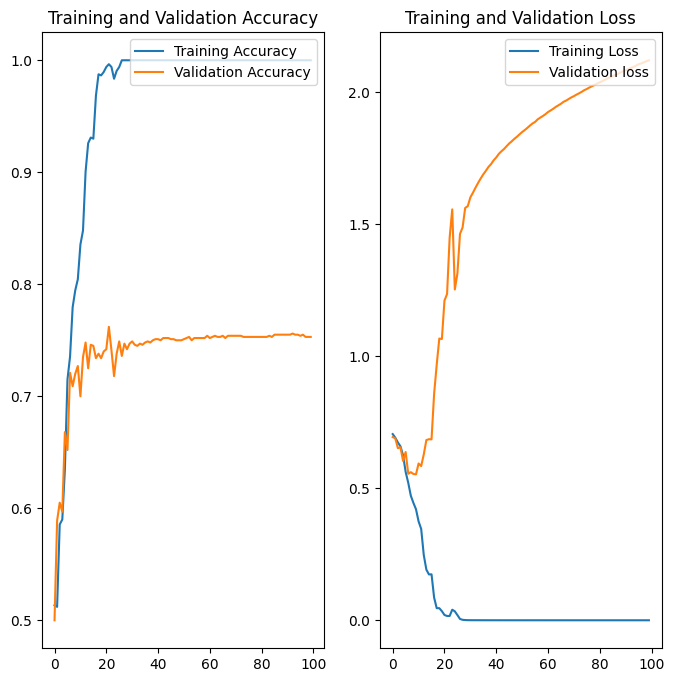

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()